# Netflix Movies and TV Shows
![image](netflix.png)

## Introduction:
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## Data Dictionary and Resources
|Column|Description|
|:----:|:---------:|
|show_id|Unique ID for every Movie / TV show|
|type|Identifier - A Movie or TV Show|
|title|Title of the Movie / Tv Show|
|director|Director of the Movie|
|cast|Actors involved in the movie / show|
|country|Country where the movie / show was produced|
|date_added|Date it was added on Netflix|
|release_year|Actual Release year of the move / show|
|rating|TV Rating of the movie / show|
|duration|Total Duration - in minutes or number of seasons|
|listed_in|Genere|
|description|The summary description|

### Resource: 
[link](https://www.kaggle.com/shivamb/netflix-shows)

## Tasks:
1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights

4. **Does Netflix has more focus on TV Shows than movies in recent years.** <font color='blue'> The task is addressed in this notebook

---

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline 

In [2]:
# load dataset
netflix = pd.read_csv('netflix_titles.csv')

--- 

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Lets check if we have duplicate rows

In [4]:
netflix.duplicated().sum()

0

- **No duplicates found**

In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- Following columns have Null values
    - `director`
    - `cast`
    - `country`
    - `date_added`
    - `rating`
    - `duration`

Lets look into each of the columns and understand what measures could be taken for the missing values 

In [6]:
# Introduce a list to contain columns with missing values
null_cols = list()

# Append the column names
for col in netflix.columns:
    if netflix[col].isnull().any() == True:
        null_cols.append(col)

In [7]:
for col in netflix[null_cols]:
    print('-'*120)
    print(col)
    print('--> NUMER OF NULL VALUES: ', netflix[null_cols][col].isnull().sum())
    print(netflix[null_cols][col].value_counts(dropna=False))

------------------------------------------------------------------------------------------------------------------------
director
--> NUMER OF NULL VALUES:  2634
NaN                        2634
Rajiv Chilaka                19
Raúl Campos, Jan Suter       18
Marcus Raboy                 16
Suhas Kadav                  16
                           ... 
Louie Schwartzberg            1
Gary Michael Schultz          1
Ben Brewer, Alex Brewer       1
Tània Balló                   1
Michael Kampa                 1
Name: director, Length: 4529, dtype: int64
------------------------------------------------------------------------------------------------------------------------
cast
--> NUMER OF NULL VALUES:  825
NaN                                                                                                                                            825
David Attenborough                                                                                                                         

- Among the columns with missing values, there is a considerable gap among the numbers. So there might be a need of addressing them separately.
    - Columns like `director`, `cast`, `country` consist of 2634, 825, and 831 null values.
    - Whereas the columns `date_added`, `rating`, and `duration` contain 10, 4, and 3 null values. 

Lets move on to figuring out the cardinality of our columns

In [8]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

- Columns such as `type`, `rating`, and `release_year` contain 2, 17, and 74,  i-e, fewer than 100 unique values out of 8807 sample points

---

Since our dataset contains a lot of textual information and there are not many columns either, lets take peeks into each og the columns to establish familiarity with what kind of information column is giving and how the column is structured

## Peeking the columns induvidually

**The column `show_id`**

In [9]:
netflix['show_id'].nunique()

8807

- The show id is a unique identifiier for each of the sample. Therefore, 100% unqiue

In [10]:
# Check if all show IDs begin with the letter 's', 
netflix.show_id.str.startswith('s').all()

True

In [11]:
# ... and followed by a numeric pattern 
netflix['show_id'].str.contains('^.*[s](\d+)').all()

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


True

- indeed, our `show_id`  begin with the letter s and followed by some numbers
- **There is no null value**

**The column `type`**

In [12]:
netflix.type.value_counts(dropna=True)

Movie      6131
TV Show    2676
Name: type, dtype: int64

- The column `type` classifies the sample for either being a *Movie* or a *TV Show*, hence a **Categorical Variable**
- **No Null value found!**

#### The column `title`

In [13]:
netflix.title.value_counts()

Super Monsters Back to School    1
Mumbai Matinee                   1
Letters to Juliet                1
Marvel's Luke Cage               1
Chelsea Does                     1
                                ..
Thambi                           1
The Shannara Chronicles          1
Elisa & Marcela                  1
Dear Dad                         1
Vampires                         1
Name: title, Length: 8807, dtype: int64

In [14]:
netflix['title'].nunique()

8807

- These are the titles of the each sample, they are 100% unique. 
- *This leads us to consider dropping `show_id`*

#### The column `director`

In [15]:
netflix['director'].value_counts(dropna=False)

NaN                        2634
Rajiv Chilaka                19
Raúl Campos, Jan Suter       18
Marcus Raboy                 16
Suhas Kadav                  16
                           ... 
Louie Schwartzberg            1
Gary Michael Schultz          1
Ben Brewer, Alex Brewer       1
Tània Balló                   1
Michael Kampa                 1
Name: director, Length: 4529, dtype: int64

- 2634 movies / TV shows do not have a director mentioned
- We can see that for some Movies / TV Shows, we can have more than one director. 
Lets check it

In [16]:
# Since we have some null values, we first replace them with a string, convert into object, split at comma, and calculate lenght
# ser_director shows INVALID frequency for movies/TV shows with 1 director.
ser_director = pd.Series(netflix['director'].replace(np.nan, 'false_string!').astype('object').str.split(',').apply(lambda x: len(x)))

# Getting a series of the frequency table.
ser_num_directors = pd.Series(ser_director.value_counts())

# an important correction!. Subtracting the missing values masked with n/a
ser_num_directors[1] = ser_num_directors[1] - 2634

ser_num_directors.sort_index()

1     5559
2      542
3       37
4       15
5        7
7        2
8        1
9        2
10       3
11       2
12       2
13       1
Name: director, dtype: int64

- We have 2634 samples that do not have a director(s) name stated. Therefore, there are 2634 NaNs
- Around 5559 movies / TV shows have one director, followed by 545 movies / TV shows that have a pair of directors.
- In few cases, the number of directors are much higher and go as high as 13.

#### The column `cast`

In [17]:
netflix['cast'].value_counts(dropna=False)

NaN                                                                                                                                            825
David Attenborough                                                                                                                              19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                         14
Samuel West                                                                                                                                     10
Jeff Dunham                                                                                                                                      7
                                                                                                                                              ... 
Ben Mendelsohn, Edie Falco, Connie Britton, Thomas Mann, Bill Camp, Elizabeth Marvel, Charlie Tahan, Michael Gaston, J

In [18]:
# Since we have some null values, we first replace them with a string, convert into object, split at comma, and calculate lenght
# ser_cast shows INVALID frequency for movies/TV shows with 1 actor.
ser_cast = pd.Series(netflix['cast'].replace(np.nan, 'false_string!').astype('object').str.split(',').apply(lambda x: len(x)))

# Getting a series of the frequency table.
ser_num_cast = pd.Series(ser_cast.value_counts(bins=np.arange(0,60,5)))

# an important correction!. Subtracting the missing values masked with n/a
ser_num_cast.iloc[1] = ser_num_cast.iloc[1] - 825

ser_num_cast.sort_index()

(-0.001, 5.0]    1917
(5.0, 10.0]      4546
(10.0, 15.0]     1212
(15.0, 20.0]      210
(20.0, 25.0]       52
(25.0, 30.0]       19
(30.0, 35.0]       10
(35.0, 40.0]        7
(40.0, 45.0]        4
(45.0, 50.0]        5
(50.0, 55.0]        0
Name: cast, dtype: int64

- We have a range of the cast size for different movies and TV shows ranging from 1 to 50!, however. aorund 6500 movies/TV shows contain less than 10 actors participating. 
- Around 8000 movies have the cast size less than of 20, meaning that less than or equal to 20 actors performed in the movie/TV show

#### The column `country`

In [19]:
netflix['country'].value_counts(dropna=False)

United States                                                           2818
India                                                                    972
NaN                                                                      831
United Kingdom                                                           419
Japan                                                                    245
                                                                        ... 
Australia, United Kingdom, United States, New Zealand, Italy, France       1
Hungary, United States                                                     1
United States, Senegal                                                     1
Zimbabwe                                                                   1
United Kingdom, France, United States, Belgium                             1
Name: country, Length: 749, dtype: int64

- 831 movie/TV shows do not have a country of production stated. **So 831 NaNs**
- There are movies/TV shows that are produced in multiple countries.
- For others, most of the movies/TV shows are produced in USA alone.

In [20]:
# Lets take all the mentions of all the countries in a list
countries = list()


for row in netflix['country'].dropna().str.split(','): # Dropped NaNs and splitted across commas
    for item in row:
        countries.append(item)

# Building a counter to get frequency table
dict_countries = {}
for country in countries:
    country = str(country.strip()) # Trimming unwanted spaces 
    if country not in dict_countries:
        dict_countries[country] = 1
    else:
        dict_countries[country] += 1

# Please note that the dictionary doesn't mention the NaNs    
# Dictionaries are orderless, to sort it we make it a series
ser_countries = pd.Series(dict_countries)
ser_countries.sort_values(ascending=False)

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Mongolia             1
Angola               1
Bahamas              1
Malawi               1
Montenegro           1
Length: 123, dtype: int64

- Around 3690 Movies / TV Shows were produced in **United States**, followed by **India**, where around 1046 Movies / TV Shows were produced

#### The column `date_added`

In [21]:
netflix['date_added'].head()

0    September 25, 2021
1    September 24, 2021
2    September 24, 2021
3    September 24, 2021
4    September 24, 2021
Name: date_added, dtype: object

In [22]:
# Changing the column into datetime
netflix['date_added'] = netflix['date_added'].apply(pd.to_datetime)

In [23]:
netflix['date_added'].isnull().sum()

10

- We have **10 NaNs** in `date_added`

#### The column `release_year`

In [24]:
netflix['release_year'].value_counts(dropna=False)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1925       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [25]:
netflix['release_year'].isnull().sum()

0

In [26]:
print('The latest year of release is',netflix['release_year'].max())

The latest year of release is 2021


In [27]:
print('The earliest year of release is', netflix['release_year'].min())

The earliest year of release is 1925


- No Null values in `release_year`
- The latest year of a release is 2021, and the earliest year of the release is 1925

#### The column `rating`

In [28]:
netflix['rating'].value_counts(dropna=False)

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
UR             3
NC-17          3
84 min         1
74 min         1
66 min         1
Name: rating, dtype: int64

- This is a categorical column. 
- **4 null values** can be found 
- We can see some bad entries. There are mentions of entries with a regex pattern *'\d[2]\s(min)'*, This pattern is rather found in the `duration` column. So we will consider them to be misplaced

So lets check these

In [29]:
# Checking those possibly 'misplaced' values
netflix[netflix['rating'].str.contains('min') == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


- The `duration` column in vacant in these samples. There is a strong possibility that the values in `ratings` actually belonged to `duration`. We will fix it

In [30]:
# Take out this troublesome part
slice1 = netflix[netflix['rating'].str.contains('min') == True].copy()

# Place the values correctly
netflix['duration'].loc[slice1.index] = slice1['rating'].copy()

# Remove the misplaced values
netflix['rating'].loc[slice1.index] = np.nan

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
# Confirmation
netflix.iloc[slice1.index]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


- Successful replacement!

#### The column `duration`

In [32]:
netflix['duration'].isnull().sum()

0

In [33]:
netflix['duration'].value_counts(dropna=False)

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
             ... 
196 min         1
178 min         1
208 min         1
16 min          1
18 min          1
Name: duration, Length: 220, dtype: int64

So apparently, we have the entries ending up with either **Season(s)** or **min**. Lets corraborate it as well. 

In [34]:
ser_duration_check = netflix['duration'].dropna().str.extract('(\s\w+)') 
ser_duration_check[0].value_counts(dropna=False)

 min        6131
 Season     1793
 Seasons     883
Name: 0, dtype: int64

- Thats Correct! All the data in the column `duration` ends up with either min (minutes) or Season(s)

Usually the length of movies is described in hours or minutes (minutes in our case) whereas the TV Shows are described as the number of seasons, episodes etc. I strongly feel that this is the case here as well. Lets check it out 

In [35]:
netflix[netflix['type'] == 'Movie']['duration'].str.contains('min').all()

True

- All the `duration` of the **movies** are in minutes, *min*

In [36]:
netflix[netflix['type'] == 'TV Show']['duration'].str.contains('Season').all()

True

- All the `duration` of the **TV Shows** are in Season(s), i.e. either *Season* or *Seasons*

#### The column `listed_in`

In [37]:
netflix['listed_in'].isnull().sum()

0

In [38]:
# Lets take all the mentions of all the genres in a list
genres = list()


for row in netflix['listed_in'].dropna().str.split(','): # Dropped NaNs and splitted across commas
    for item in row:
        genres.append(item)

# Building a counter to get frequency table
dict_genres = {}
for genre in genres:
    genre = str(genre.strip()) # Trimming unwanted spaces 
    if genre not in dict_genres:
        dict_genres[genre] = 1
    else:
        dict_genres[genre] += 1

# Please note that the dictionary doesn't mention the NaNs    
# Dictionaries are orderless, to sort it we make it a series
ser_genre = pd.Series(dict_genres)
ser_genre = ser_genre.sort_values(ascending=False)

In [39]:
ser_genre

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

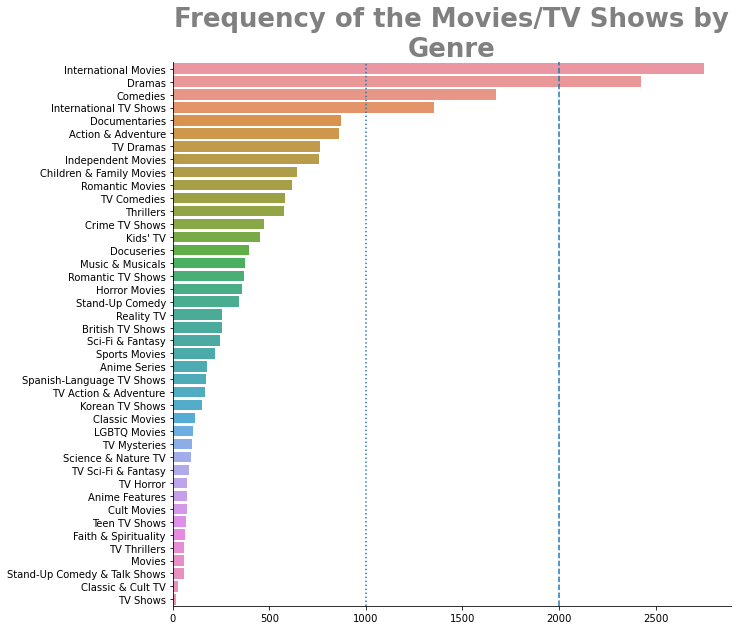

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(x=ser_genre.values, y=ser_genre.index)
plt.axvline(1000, linestyle=':')
plt.axvline(2000, linestyle='--')
plt.title('Frequency of the Movies/TV Shows by\nGenre', weight='bold', fontsize=26, color='grey')
sns.despine()

- Genres such as International Movies, and Dramas look very popular with each having 2000+ Movies / TV Shows associated
- Next comes the genres such as Comedies, and International TV Shows with each having 1000+ Movies / TV Shows associated

P.S 2000, and 1000 are just arbitrary numbers

#### The column `description`

In [41]:
netflix['description'].isnull().sum()

0

In [42]:
netflix['description'].head()

0    As her father nears the end of his life, filmm...
1    After crossing paths at a party, a Cape Town t...
2    To protect his family from a powerful drug lor...
3    Feuds, flirtations and toilet talk go down amo...
4    In a city of coaching centers known to train I...
Name: description, dtype: object

- The column contains large texts and has no missing values

<font color = 'red'> TO DO

In [43]:
### Explain which are categorical variables. 
### How missing values to be dealt
### displaced values
### answer questions

---

## Does Netflix has more focus on TV Shows than movies in recent years?

In [44]:
# Extract year from the date_added
netflix['year_added'] = netflix['date_added'].dt.year

In [45]:
ser_ans4 = netflix.groupby(['year_added','type'])['type'].count()
ser_ans4

year_added  type   
2008.0      Movie         1
            TV Show       1
2009.0      Movie         2
2010.0      Movie         1
2011.0      Movie        13
2012.0      Movie         3
2013.0      Movie         6
            TV Show       5
2014.0      Movie        19
            TV Show       5
2015.0      Movie        56
            TV Show      26
2016.0      Movie       253
            TV Show     176
2017.0      Movie       839
            TV Show     349
2018.0      Movie      1237
            TV Show     412
2019.0      Movie      1424
            TV Show     592
2020.0      Movie      1284
            TV Show     595
2021.0      Movie       993
            TV Show     505
Name: type, dtype: int64

In [46]:
df_ans4 = ser_ans4.unstack()
df_ans4

type,Movie,TV Show
year_added,,
2008.0,1.0,1.0
2009.0,2.0,NaN
2010.0,1.0,NaN
2011.0,13.0,NaN
2012.0,3.0,NaN
2013.0,6.0,5.0
2014.0,19.0,5.0
2015.0,56.0,26.0
2016.0,253.0,176.0


In [47]:
# 

# Lets fill NaNs with 0 for better operation. By looking at the trends, we can see that NaNs mean no entry
df_ans4.fillna(0, inplace=True)

# reset index to make year_added a columm
df_ans4 = df_ans4.reset_index()

# melt to achieve a longer format for seaborn's hue to work
ans4 = pd.melt(df_ans4, id_vars='year_added', value_vars=['Movie','TV Show'], var_name='type')

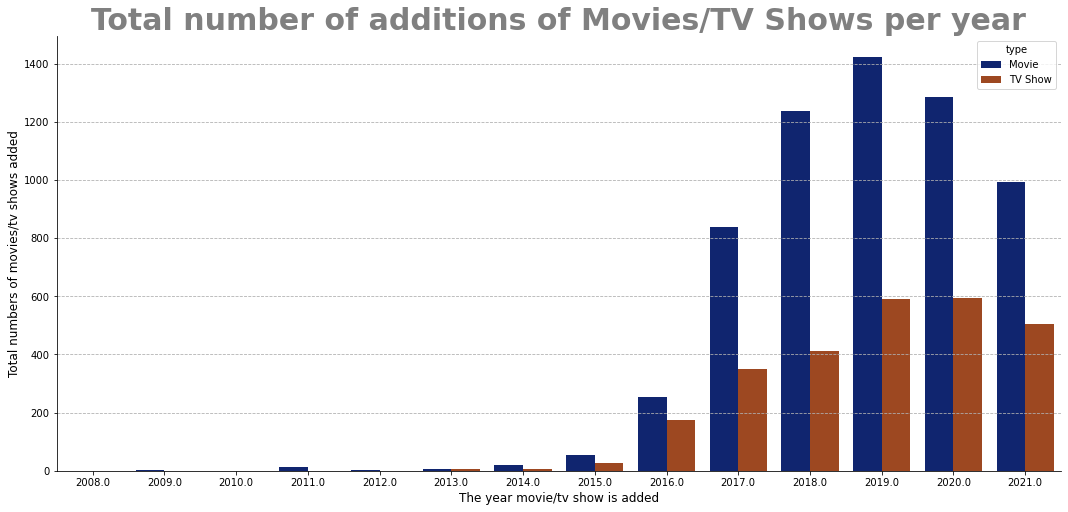

In [48]:
# plot
plt.figure(figsize=(18,8))
sns.barplot(data=ans4, x='year_added', y='value', hue='type', palette='dark')
plt.xlabel('The year movie/tv show is added', fontsize=12)
plt.ylabel('Total numbers of movies/tv shows added', fontsize=12)
plt.title('Total number of additions of Movies/TV Shows per year', 
          weight='bold', color='grey',
          fontsize=30)
plt.grid(axis='y', ls='--')
sns.despine()


### Findings:
- From the graph above, we can not say that Netflix has been made any dramatic switch of focus from `Movies` to `TV Shows`. Apparetnly, the Number of TV Shows remain roughly propotionate to the total number of additions (Movies + TV Shows).

To look further into this to check for gradual shift of focus (if any), lets relate the number of TV Shows added with the total number of additions, depicted as percentage of TV Shows `tv_shows_as_pc` 


In [49]:
df_ans4['total'] = df_ans4['TV Show'] + df_ans4['Movie']
df_ans4['tv_shows_as_pc'] = df_ans4['TV Show']/df_ans4['total']*100
df_ans4

type,year_added,Movie,TV Show,total,tv_shows_as_pc
0,2008.0,1.0,1.0,2.0,50.000000
1,2009.0,2.0,0.0,2.0,0.000000
2,2010.0,1.0,0.0,1.0,0.000000
3,2011.0,13.0,0.0,13.0,0.000000
4,2012.0,3.0,0.0,3.0,0.000000
5,2013.0,6.0,5.0,11.0,45.454545
6,2014.0,19.0,5.0,24.0,20.833333
7,2015.0,56.0,26.0,82.0,31.707317
8,2016.0,253.0,176.0,429.0,41.025641
9,2017.0,839.0,349.0,1188.0,29.377104


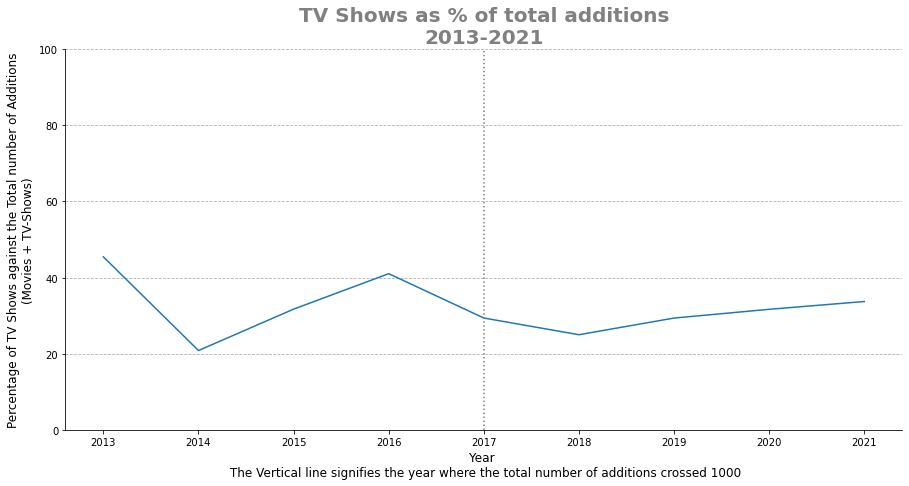

In [50]:
# plot
plt.figure(figsize=(15,7))
sns.lineplot(data=df_ans4.iloc[5:], x='year_added', y='tv_shows_as_pc')
plt.ylim(0,100)
plt.title('TV Shows as % of total additions\n2013-2021', weight='bold', 
         color='grey', fontsize=20)
plt.ylabel('Percentage of TV Shows against the Total number of Additions\n(Movies + TV-Shows)', fontsize=12)
plt.xlabel('Year \n The Vertical line signifies the year where the total number of additions crossed 1000', fontsize=12)
plt.grid(axis='y', ls='--')
plt.axvline(x=2017, color='grey',ls=':')
sns.despine()

plt.show()


### Conclusion: 
- Indeed, It does look like that there has been a gradually increasing focus on TV Shows since 2018.
    - In 2018, the TV Shows were around 25% of the total additions
    - Whereas by 2021, this has increased to nearly 34%. Moreover, the increase has been consistent. 
    
---

In [ ]:
In the next part, I will be addressing